# Pizza plot for last NBA season to date

## Imports 

In [1]:
import pandas as pd 
import numpy as np 

from scipy import stats
import math 

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt 

from PIL import Image

## Retrieve last NBA season to date stats for 2011 first Round Draft picks

In [2]:
df = pd.read_csv("../data/last_NBA_season_stats.csv")

In [3]:
df.shape

(30, 31)

In [4]:
df.head()

,Player,Season,Age,Tm,Lg,Pos,G,GS,MP/G,FG,...,FT%,ORB,DRB,RB/G,AST/G,STL/G,BLK/G,TOV,PF,PTS/G
0,Jimmy Butler,2020-21,31,MIA,NBA,SF,52,52,33.6,7.0,...,0.863,1.8,5.1,6.9,7.1,2.1,0.3,2.1,1.4,21.5
1,Kyrie Irving,2020-21,28,BRK,NBA,PG,54,54,34.9,10.2,...,0.922,1.0,3.8,4.8,6.0,1.4,0.7,2.4,2.6,26.9
2,Derrick Williams,2017-18,26,LAL,NBA,PF,2,0,4.5,0.5,...,NaN,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0
3,Enes Kanter,2020-21,28,POR,NBA,C,72,35,24.4,4.7,...,0.774,3.9,7.1,11.0,1.2,0.5,0.7,1.1,2.3,11.2
4,Tristan Thompson,2020-21,29,BOS,NBA,PF,54,43,23.8,3.1,...,0.592,3.1,5.0,8.1,1.2,0.4,0.6,1.1,2.2,7.6


In [5]:
butler_cropped = Image.open("../assets/butler_cropped_image_2.png")

## Clean last NBA season data

## Load some fonts

In [6]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

## Select some columns

In [7]:
df.columns

Index(['Player', 'Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP/G', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'RB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV',
       'PF', 'PTS/G'],
      dtype='object')

In [8]:
params = ['MP/G', 'PTS/G', 'AST/G', 'RB/G', 'STL/G', 'BLK/G', 'FG%', '3P%', 'FT%']

## Select Butler data

In [9]:
player = df.loc[df['Player']=='Jimmy Butler'].reset_index()

In [10]:
player

,index,Player,Season,Age,Tm,Lg,Pos,G,GS,MP/G,...,FT%,ORB,DRB,RB/G,AST/G,STL/G,BLK/G,TOV,PF,PTS/G
0,0,Jimmy Butler,2020-21,31,MIA,NBA,SF,52,52,33.6,...,0.863,1.8,5.1,6.9,7.1,2.1,0.3,2.1,1.4,21.5


In [11]:
player = player[params]

In [12]:
player

,MP/G,PTS/G,AST/G,RB/G,STL/G,BLK/G,FG%,3P%,FT%
0,33.6,21.5,7.1,6.9,2.1,0.3,0.497,0.245,0.863


In [13]:
player = list(player.loc[0])
print(player)

[33.6, 21.5, 7.1, 6.9, 2.1, 0.3, 0.497, 0.245, 0.863]


In [14]:
print(len(params), len(player))

9 9


## Calculate the percentiles

In [15]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [16]:
round(stats.percentileofscore(df[params[0]],player[0]))

90

In [17]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

## Build the pizza

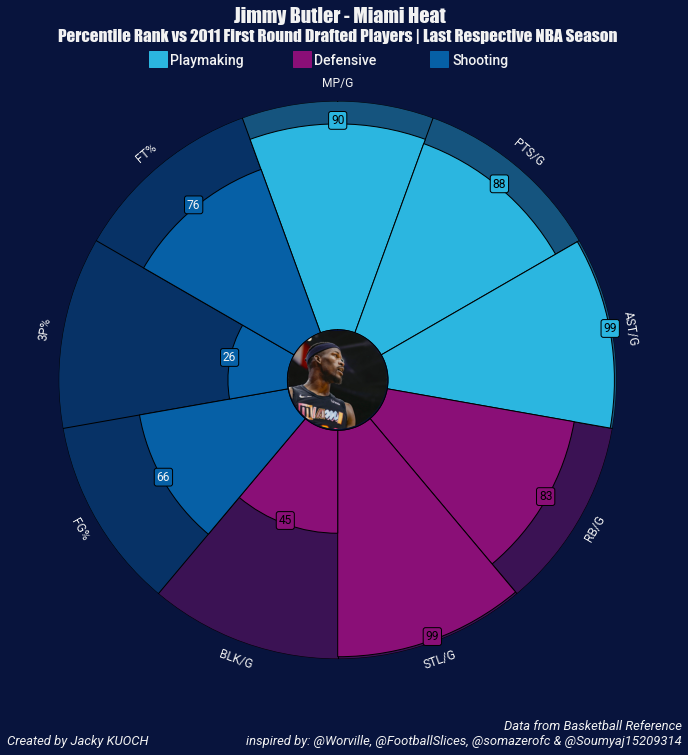

In [18]:
# color for the slices and text
slice_colors = ["#2bb6e0"] * 3 + ["#8A0F77"] * 3 + ["#0660A6"] * 3
text_colors = ["#000000"] * 6 + ["#F2F2F2"] * 3

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#08143D",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=22           # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(0.515, 0.975, "Jimmy Butler - Miami Heat", size=20,ha="center", fontname = 'Impact', color="#F2F2F2")

# add subtitle
fig.text(0.515, 0.95,"Percentile Rank vs 2011 First Round Drafted Players | Last Respective NBA Season ", size=17, ha="center", fontname = 'Impact', color="#F2F2F2", fontweight="light")

# add credits
CREDIT_1 = "Data from Basketball Reference"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=13,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right")
    
fig.text(0.25, 0.02, "Created by Jacky KUOCH", size=13, fontproperties=font_italic.prop, color="#F2F2F2",ha="right")

# add text
fig.text(0.28, 0.92, "Playmaking", size=14, fontproperties=font_bold.prop, color="#F2F2F2")
fig.text(0.48, 0.92, "Defensive", size=14, fontproperties=font_bold.prop, color="#F2F2F2")
fig.text(0.672, 0.92, "Shooting", size=14, fontproperties=font_bold.prop, color="#F2F2F2")

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.917), 0.025, 0.021, fill=True, color="#2bb6e0",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.45, 0.917), 0.025, 0.021, fill=True, color="#8A0F77",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.64, 0.917), 0.025, 0.021, fill=True, color="#0660A6",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(butler_cropped, fig, left=0.439, bottom=0.438, width=0.145, height=0.130)


plt.show()